# K-Means Clustering from Scratch

### 📘 Introduction
K-Means is one of the simplest and most popular unsupervised machine learning algorithms used for clustering. It partitions data into **K** distinct clusters based on feature similarity.

### 💡 Objective
Given a dataset $X = \{x_1, x_2, ..., x_n\}$, K-Means aims to partition the data into $K$ clusters $C = \{C_1, C_2, ..., C_K\}$ by minimizing the **within-cluster sum of squares**:

$$ J = \sum_{k=1}^K \sum_{x_i \in C_k} \|x_i - \mu_k\|^2 $$
Where $\mu_k$ is the centroid (mean) of cluster $C_k$.

### 🔁 Algorithm Steps
1. Initialize $K$ centroids randomly
2. Assign each sample to the nearest centroid
3. Recompute centroids as the mean of the assigned samples
4. Repeat steps 2–3 until convergence (no change in assignments or centroids)

###  Euclidean Distance
The standard distance metric used is Euclidean distance:

$$ d(x_1, x_2) = \sqrt{\sum_{i=1}^{n} (x_{1i} - x_{2i})^2} $$

### Task 1: Implement Euclidean Distance Function
Location:
`def euclidean_distance(x1, x2)`

This function should return the Euclidean distance between two vectors `x1` and `x2`.  
Use NumPy operations to compute the square root of the sum of squared differences.

**Expected formula:**
$ d(x_1, x_2) = \sqrt{\sum_{i=1}^{n} (x_{1i} - x_{2i})^2} $

 *Hint:* You can use `np.sqrt()` and element-wise subtraction/square/sum.

### Task 2: Assign to the Closest Centroid
Location:
Method `def self._closest_centroid(self, sample, centroids)`

Given a `sample` (a data point), and a list of current `centroids`,  
you should compute the distance from the sample to **each** centroid  
and return the **index** of the closest one.

 *Hint:* Use the `euclidean_distance()` function you just implemented.  
Loop over `centroids`, calculate the distances, then use `np.argmin()` to find the index of the minimum.


### Task 3: Define the Convergence Condition
Location:
Method `def _is_converged(self, centroids_old, centroids)`

This method checks whether the algorithm should stop.  
You should compare the old and new centroids — if they have not changed (or moved very little), return `True`.

*Hint:* Compute the Euclidean distance between each old and new centroid.  
If the total distance is 0 (or below a small threshold like `1e-6`), return `True`, else `False`.

💡 Optionally, use a list comprehension for distances and `sum(...)` to aggregate.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
from IPython.display import display

np.random.seed(42)

def euclidean_distance(x1, x2):
    # TODO: implement Euclidean distance between x1 and x2
    # Pseudocode:
    # 1. Subtract x2 from x1 (element-wise)
    # 2. Square the result
    # 3. Sum the squared differences
    # 4. Take the square root of the sum
    return # TODO

class KMeans:
    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean feature vector) for each cluster
        self.centroids = []
        self.history = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):

            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)


            self.history.append((list(self.centroids), list(self.clusters)))

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):

      # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # TODO: compute distance from sample to each centroid and return index of closest
        # Pseudocode:
        # 1. For each centroid:
        #     a. Compute distance between sample and centroid using euclidean_distance()
        # 2. Store all distances in a list
        # 3. Return the index of the minimum distance (np.argmin)
        return # TODO


    def _get_centroids(self, clusters):

        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):

        # TODO: return True if all centroids have stopped moving
        # Pseudocode:
        # 1. Initialize total_movement = 0
        # 2. For each pair of old and new centroids:
        #     a. Compute distance between old and new
        #     b. Add to total_movement
        # 3. If total_movement is 0 (or very small), return True, else False
        return # TODO


    def plot_slider(self):
        def plot_iteration(i):
            centroids, clusters = self.history[i]
            fig, ax = plt.subplots(figsize=(12, 8))
            for j, cluster in enumerate(clusters):
                points = self.X[cluster].T
                ax.scatter(*points)
            for point in centroids:
                ax.scatter(*point, marker="x", color="black", linewidth=2)
            ax.set_title(f"Iteration {i+1}")
            plt.show()

        interact(plot_iteration, i=IntSlider(min=0, max=len(self.history)-1, step=1, value=0))

### Testing with Synthetic Data
We use `make_blobs` from `sklearn.datasets` to generate test data.

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150)
y_pred = k.predict(X)
k.plot_slider()

(500, 2)
3


interactive(children=(IntSlider(value=0, description='i', max=2), Output()), _dom_classes=('widget-interact',)…

### ✅ Summary
- We implemented K-Means from scratch in Python
- Tested it on synthetic data with visualizations
- Understood the math and logic behind the algorithm

## Elbow Method: Choosing the Optimal Number of Clusters

K-Means requires specifying the number of clusters `K` in advance.  
To find a suitable `K`, we can use the **Elbow Method** — a simple but effective heuristic.

We run K-Means for a range of values of `K`, compute the **inertia** (within-cluster sum of squared distances),  
and plot the result. The point where the curve begins to “bend” (like an elbow) indicates a good choice.

### Inertia (Distortion Score)

Inertia measures how tightly grouped the clusters are:

$\text{Inertia} = \sum_{i=1}^n \min_{\mu_j \in C} \|x_i - \mu_j\|^2$

Lower inertia is better — but more clusters always reduce inertia.  
We want to find the point after which the gain becomes marginal.


### How to Interpret the Elbow Plot

In the plot of `K` vs. `Inertia`, look for a “knee” or “elbow” point.

- Left of the elbow: adding clusters significantly reduces inertia
- Right of the elbow: adding clusters gives little benefit

**The elbow is a trade-off between model complexity and fit quality.**


###  Task: Implement the Elbow Method (Manually)

You are now going to implement a basic version of the **Elbow Method** to decide the optimal number of clusters `K`.

Your task is to:

1. Loop over values of `K` from 1 to 9
2. For each `K`, fit your own `KMeans` implementation to the data
3. Compute the total **inertia**: the sum of squared distances from each sample to its assigned centroid
4. Store inertia values and plot them as a function of `K`

*Hint:* Use `np.linalg.norm(..., axis=1) ** 2` to compute squared distances.

Goal: Find the “elbow” in the plot where adding more clusters doesn't reduce inertia significantly.


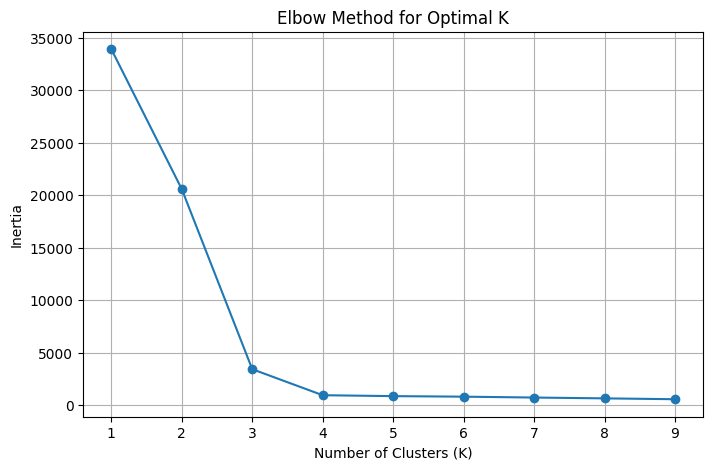

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

inertias = []
K_range = range(1, 10)

for k in K_range:
    # TODO: Create an instance of your KMeans class with K = k
    # TODO: Fit it to data X using the .predict() method
    # TODO: Calculate total inertia: sum of squared distances from each point to its cluster centroid

    # Pseudocode:
    # total_inertia = 0
    # for each cluster:
    #     get centroid
    #     get points in this cluster
    #     compute squared distance from each point to centroid
    #     add to total_inertia

    # inertias.append(total_inertia)
    pass

# TODO: After loop, plot K vs. inertia using matplotlib
# Add titles, labels, grid
